In [41]:
from keras import models
from keras import layers

def build_network(hidden_layer_size, output_size=10):
    network = models.Sequential()
    network.add(layers.Dense(hidden_layer_size, activation='relu', input_shape=(28*28,)))
    network.add(layers.Dense(output_size, activation='softmax'))
    
    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

In [42]:
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_data(train_size):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
    x_val = x_train[train_size:]
    y_val = y_train[train_size:]
    
    x_train = x_train[:train_size]
    y_train = y_train[:train_size]

    x_train = x_train.reshape((-1, 28*28))
    x_train = x_train.astype('float32')/255

    x_test = x_test.reshape((-1, 28*28))
    x_test = x_test.astype('float32')/255

    x_val = x_val.reshape((-1, 28*28))
    x_val = x_val.astype('float32')/255
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_val = to_categorical(y_val)
    
    return x_train, y_train, x_test, y_test, x_val, y_val

In [43]:
network = build_network(512)
x_train, y_train, x_test, y_test, x_val, y_val = prepare_data(1000)

In [44]:
history = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 59000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3339 - acc: 0.6250 - val_loss: 0.7861 - val_acc: 0.8046
Epoch 2/20
1000/1000 [==============================] - 1s 676us/step - loss: 0.5901 - acc: 0.8570 - val_loss: 0.6361 - val_acc: 0.8199
Epoch 3/20
1000/1000 [==============================] - 1s 678us/step - loss: 0.4270 - acc: 0.8940 - val_loss: 0.5405 - val_acc: 0.8437
Epoch 4/20
1000/1000 [==============================] - 1s 700us/step - loss: 0.3280 - acc: 0.9190 - val_loss: 0.4839 - val_acc: 0.8606
Epoch 5/20
1000/1000 [==============================] - 1s 809us/step - loss: 0.2613 - acc: 0.9440 - val_loss: 0.4843 - val_acc: 0.8568
Epoch 6/20
1000/1000 [==============================] - 1s 684us/step - loss: 0.2222 - acc: 0.9520 - val_loss: 0.4140 - val_acc: 0.8790
Epoch 7/20
1000/1000 [==============================] - 1s 708us/step - loss: 0.1863 - acc: 0.9590 - val_loss: 0.4570 - val_acc: 0.8625
E

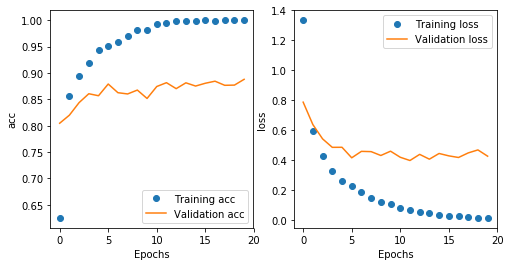

In [45]:
from util import plot_history

plot_history(history)

In [46]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 26us/step
test acc: 0.8918


In [47]:
network = build_network(256)
history2 = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 59000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 889us/step - loss: 1.4986 - acc: 0.6090 - val_loss: 0.9515 - val_acc: 0.7766
Epoch 2/20
1000/1000 [==============================] - 1s 505us/step - loss: 0.7166 - acc: 0.8500 - val_loss: 0.7213 - val_acc: 0.8005
Epoch 3/20
1000/1000 [==============================] - 0s 493us/step - loss: 0.5170 - acc: 0.8850 - val_loss: 0.6049 - val_acc: 0.8343
Epoch 4/20
1000/1000 [==============================] - 1s 732us/step - loss: 0.4075 - acc: 0.9170 - val_loss: 0.5630 - val_acc: 0.8382
Epoch 5/20
1000/1000 [==============================] - 1s 532us/step - loss: 0.3380 - acc: 0.9210 - val_loss: 0.5194 - val_acc: 0.8492
Epoch 6/20
1000/1000 [==============================] - 1s 547us/step - loss: 0.2766 - acc: 0.9410 - val_loss: 0.5225 - val_acc: 0.8457
Epoch 7/20
1000/1000 [==============================] - 1s 541us/step - loss: 0.2387 - acc: 0.9480 - val_loss: 0.4753 - val_acc: 0.8563

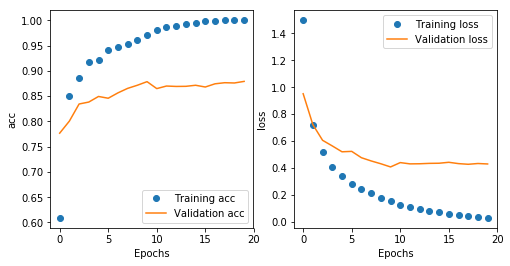

In [48]:
plot_history(history2)

In [49]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 20us/step
test acc: 0.8812


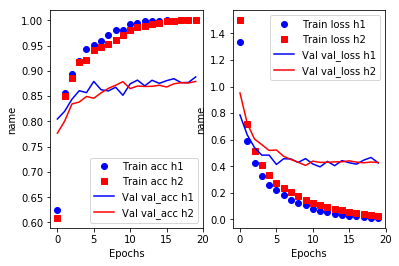

In [50]:
from util import compare_history

compare_history(history, history2)